# Harmonic Motion of A Spring
Interactive code to illustrate concepts from MAT201 at Abertay University (JT 2022).

Notebook illustrates how to solve Newton's Second Law for a force which induces Simple Harmonic Motion.We also create an animated object which behaves according to those laws. While the object is moving, notebook also draws accompanying distance, velocity and acceleration graphs.. 

Plotting inspiration from http://firsttimeprogrammer.blogspot.com/2014/12/basic-physics-and-python-simple.html

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.patches as patches
import sympy as sym
import math

## Simple Harmonic Motion: Solving Newton's Second Law

We'll start by repeating the steps we saw by hand in the lecture to derive expressions for the displacement, velocity and acceleration of an object subject to simple Harmonic Motion.

NB you may be required to perform these steps mathematically by hand **for the exam**; the symbolic computation approach here is just to verify our solutions and demonstrate the resulting behaviour of the object, governed by the mathematics seen in lectures.

We saw that an object subject to a force of the form $F=-kx$ (for some constant $k$) causes that object to accelerate towards its equilibrium position, but due to its momentum, overshoots and repeatedly oscillates about this position.

Newton's Second Law states:

\begin{equation}
\frac{{\rm{d}}^2x(t)}{{\rm{d}}t^2} = a(t) = \frac{F(t)}{m} = -\frac{k}{m}x(t),
\end{equation} 

In the lectures, we saw that we could re-write the acceleration term $a$ as \begin{equation}
a=\frac{{\rm d}v}{{\rm{d}}t}=\frac{{\rm d}v}{{\rm{d}}x}\frac{{\rm d}x}{{\rm{d}}t}=v\frac{{\rm d}v}{{\rm{d}}x}.
\end{equation}



Therefore we can state our equation as a seperable first order differential equation:
\begin{equation}
v\frac{{\rm d}v}{{\rm{d}}x}=-\frac{k}{m}x=-\omega^2x,
\end{equation}
(where we have replaced some of the constants with a frequency $\omega$).

Python is great at solving differential equations. First we'll set up the variables in the problem. The differential equation solver needs to know some of the properties of the symbols it will be working with in order to do its job more effectively.


In [ ]:
x = sym.symbols('x', real = True)
w = sym.symbols('ω', real = True, positive = True, nonzero = True)
A = sym.symbols('A', real = True, positive = True, nonzero = True)
phi = sym.symbols('phi' , real = True)
v = sym.Function('v')

Now we'll create a differential equation and ask Python to solve it. We know from the lectures that we need to use some initial conditions to evaluate some of the constants of integration. In this case, we know that when the object is displaced by the amplitude of oscillation, $A$, then the velocity must be zero. 

Python can solve differential equations if all the terms are on one side of the equation and this equals zero. Shifting $-\omega^2x$ over to the LHS means that we can use *dsolve* (with the initial condition described above):

In [ ]:
eq1 = v(x)*v(x).diff(x) + w**2*x
vofx=sym.dsolve(eq1,v(x), ics={v(A): 0})
vofx[0]

Eq(v(x), -sqrt(A**2*ω**2 - x**2*ω**2))

The first solution is displayed up above, and is the negative solution. This is one of two solutions that Python has found, with the other being:

In [ ]:
vofx[1]

Eq(v(x), sqrt(A**2*ω**2 - x**2*ω**2))

Both solutions are identical to those found in the lectures.

Now lets work in time, and use the same tricks to calculate the displacement as a function of time. The differential equation solver in Python isn't set up to know that our previous independent variable $x$ is now our *dependent* variable, $x(t)$. We have to make Python forget the earlier solution, and input it by hand, but we can solve it in the same way as before (while also stating the initial condition that at $t=0$, the displacement will be determined by $A\sin{\left(\phi\right)}$, where $\phi$ is our phase shift):

In [ ]:
t = sym.symbols('t', real = True)
x = sym.Function('x')
eq2 = x(t).diff(t)-sym.sqrt(A*A*w*w-x(t)*x(t)*w*w)
xoft=sym.dsolve(eq2,x(t), ics={x(0):A*sym.sin(phi)})
print("x(t)=", xoft.rhs)
print("v(t)=", sym.diff(xoft.rhs,t))
print("a(t)=", sym.diff(xoft.rhs,t,2))

x(t)= A*sin(phi + t*ω)
v(t)= A*ω*cos(phi + t*ω)
a(t)= -A*ω**2*sin(phi + t*ω)


We've taken advantage of the fact that Python can also handle differentiation too: we've taken the solution of the differential equation that Python has found and differentiated until we have the expressions we expected to find for displacment, velocity and acceleration.

## Animating Simple Harmonic Motion

Now that we have verified our solutions to Newton's Second Law for the force $F=-kx$, now its time to see what this looks like in action.

We'll choose some initial values for the constants of motion. Feel free to change these and re-run the animation to see what difference this makes to the observed behaviour:

In [ ]:
k = 50            #spring constant
m = 20            #mass (kg)
w = np.sqrt(k/m)  #angular frequency omega
phi = 0           #phase shift
A = 3             #amplitude (m)
dt = 0.05         #time step for the animation (s)

We'll set up Python functions which at a given time will return the displacement, velocity and acceleration. Note that the returned functions exactly match those solved for earlier in the notebook:

In [ ]:
def disp(t):
    global w,phi,A
    return A*np.sin(w*t+phi)
def vel(t):
    global w,phi,A
    return A*w*np.cos(w*t+phi)
def accel(t):
    global w,phi,A
    return -A*w**2*np.sin(w*t+phi)

Things are going to get complicated now! 
First we'll set up a figure containing 4 subplots so that we can plot lots of animated graphs:

(-5.0, 5.0)

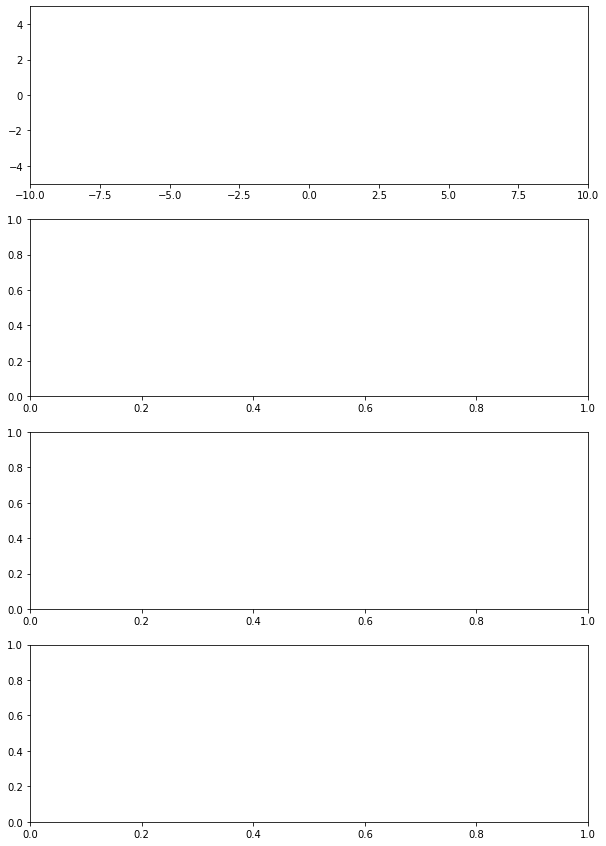

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.set_size_inches(10, 15)
ax1.set_xlim(-10,10)
ax1.set_ylim(-5,5)

In the top figure, we'll draw an object oscillating with SHM. For argument's sake, we'll make it a box. 
The first time we draw it, we'll place the centre of the box at the position (i.e. displacement) at $t=0$. Quite often, this is at $x=0$, but also depends on the phase shift $\phi$. Once we've drawn everything, try changing the phase and seeing where the box is initially drawn.



In [ ]:
box= np.array([
    [-1.0+disp(0.0), -1.0],  
    [-1.0+disp(0.0), 1.0],  
    [1.0+disp(0.0), 1.0],
    [1.0+disp(0.0),-1.0]
    ])
patch = patches.Polygon(box,closed=True, fc='black', ec='black')

Now, because we're excellent at programming(!), I think it would help to see the size and direction of the velocity and acceleration vectors associated with the box.
To do this, I'm going to make some arrows, centred on the middle of the box, and with sizes determined by $a(t)$ and $v(t)$.

In [ ]:
patch2 = patches.Arrow(disp(0.0), 0.0, accel(0.0), 0.0, color='blue')
patch3 = patches.Arrow(disp(0.0), 0.0, vel(0.0), 0.0, color='green')
ax1.add_patch(patch)
ax1.add_patch(patch2)
ax1.add_patch(patch3)

Now we'll set up remaining things to do with the plots, things like labelling each axis. Plot 2 will be the displacement as a function of time, Plot 3 will be the velocity and Plot 4 will be the acceleration. Each of the plots will have to have different a y-axis, so we'll loop round each plot to set the scales correctly.

In [ ]:
ax1.set_xlabel("$x [m]$")
time_template = 'time = %.1fs'
time_text = ax1.text(-7.5, 4, '', transform=ax1.transAxes)
#set up other subplots
line1, = ax2.plot([], [], lw=2, color='r')
line2, = ax3.plot([], [], lw=2, color='g')
line3, = ax4.plot([], [], lw=2, color='b')
iy = 0
ax2.set_ylabel("$x [m]$")
ax2.text(4,1.1*A,'$x_{max}=A$', color='black')
ax3.set_ylabel("$v [ms^{-1}]$")
ax3.text(4,1.1*A*w,'$v_{max}=A\omega$', color='black')
ax4.set_ylabel("$a [ms^{-2}]$")
ax4.text(4,1.1*A*w*w,'$a_{max}=A\omega^2$', color='black')
#loop round plots and set various ranges and labels
for ax in [ax2, ax3, ax4]:
    ax.set_ylim(-1.25 * A * w ** iy, 1.25 * A * w ** iy)
    upperbound = A * w ** iy
    lowerbound = -A * w ** iy
    ax.axhline(y=upperbound, xmin=0, xmax=5, c="black", linewidth=2, linestyle="--", zorder=0)
    ax.axhline(y=lowerbound, xmin=0, xmax=5, c="black", linewidth=2, linestyle="--", zorder=0)
    iy+=1
    ax.set_xlim(0, 5)
    ax.set_xlabel("$t [s]$")
    ax.axhline(y=0, xmin=0, xmax=5, c="black", linewidth=2, zorder=0)    
    ax.grid()

Finally, we'll create some arrays to store the time values (lets call that "xdata"), and the displacement, velocity and acceleration (which will be displayed on the y-axis of each plot)

In [ ]:
xdata, y1data, y2data, y3data = [], [], [], []

For the animation to work, we need to set up a couple of functions, the first will initialise some of the variables.

In [ ]:
def init():
    #required for animation
    global time_text
    #ax1.add_patch(patch2)
    #ax1.add_patch(patch3)
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    time_text.set_text('') 
    return patch, time_text, line1, line2, line3, patch2, patch3,

Next comes the animation: essentially the code will count up in time, recalculate (and append) $t, x, v, a$ and then redraw both the object and arrows, and the graphs.

In [ ]:
def animate(i):
    global patch2, patch3
    #thing to be animated
    y1 = disp(dt*i)
    xdata.append(dt*i)
    y1data.append(disp(dt*i))
    y2data.append(vel(dt*i))
    y3data.append(accel(dt*i))
    box= np.array([
    [-1.0+disp(dt*i), -1.0],  
    [-1.0+disp(dt*i), 1.0],  
    [1.0+disp(dt*i), 1.0],
    [1.0+disp(dt*i),-1.0]
    ])
    patch.set_xy(box)
    ax1.patches.remove(patch2)
    ax1.patches.remove(patch3)
    patch2 = patches.Arrow(disp(dt*i), 0.0, accel(dt*i), 0.0, color='blue')
    patch3 = patches.Arrow(disp(dt*i), 0.0, vel(dt*i), 0.0, color='green')
    ax1.add_patch(patch2)
    ax1.add_patch(patch3)
    time_text.set_text(time_template%(i*dt))
    line1.set_data(xdata, y1data)
    line2.set_data(xdata, y2data)
    line3.set_data(xdata, y3data)
    return patch, time_text, line1, line2, line3, patch2, patch3,

Final stage is to choose how many timesteps to loop over and feed all the functions into the animation. We'll also display it as html5 video for ease. Warning: the higher the number of frames, the longer the animation will take to generate.

In [ ]:
interval = 1000*dt
anim = animation.FuncAnimation(fig, animate, interval=interval, init_func=init,
                               blit=True, repeat=False)
from IPython.display import HTML
HTML(anim.to_html5_video())

And there you have it. Note where each graph peaks relative to the others. 
For example, you have seen from our mathematics lectures that the velocity is at its maximum value as it passes the location of zero displacement.
You will also note that the acceleration reaches a maximum (or minimum) when the displacement is also at maximum and when the velocity is zero.

Try changing some of the parameters in the initial setup and re-running the code. What effect does the amplitude have? How do the graphs compare for the same parameters but with different phase-shift values..?

## Summary

In the first part of this notebook, we used Python to verify our mathematical solutions seen in the lectures. Remember that for MAT201, I expect you to be able to perform all the integration and differentiation steps yourself by hand in order to determine expressions for $x(t), v(t), v(x)$ and $a(t)$.

In the second part, we saw what these functions mean practically using an animation. Each of the graphs of displacement, velocity and acceleration are sinusoidal, and repeat over time, no matter the values of parameters chosen.